#importing the required libries 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importingh the required files and 
df = pd.read_csv('medical_examination.csv')

#formating the age from days to years(divide by 365)
df['age'] = round(df['age']/365,1)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df[['age','weight','height']].describe()
##validate the age range 

,age,weight,height
count,70000.000000,70000.000000,70000.000000
mean,53.339486,74.205690,164.359229
std,6.759534,14.395757,8.210126
min,29.600000,10.000000,55.000000
25%,48.400000,65.000000,159.000000
50%,54.000000,72.000000,165.000000
75%,58.400000,82.000000,170.000000
max,65.000000,200.000000,250.000000


Notice that they there are weight of 10 kg which is almost impossible
so, this is a pronpt that we should check the weight columns for outliers that

Text(0, 0.5, 'Height')

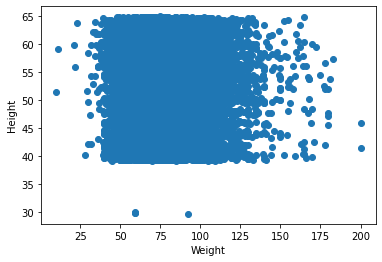

In [5]:
plt.scatter(y= df['age'], x = df['weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

We an request for the walue from the data engineer to validate the collection of this values
if not we could either remove this values or for values less than 20,we assume a zero was ommmited so we multiply by 10

In [6]:
#checks the types in values in height and weight 
df[['weight','height']].info()

#converts height and weight to float
df['height'] = df['height'].astype(float)

#verify
df[['weight','height']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  70000 non-null  float64
 1   height  70000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  70000 non-null  float64
 1   height  70000 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [7]:
#coverts height fom cm to meters
df['height']
df['height'] = df['height']/100

In [8]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,1.56,56.0,100,60,1,1,0,0,0,0


In [9]:
df['bmi'] =round(df['weight']/((df['height'])**2),1)
df['overweight'] = [1 if x > 25 else 0 for x in df['bmi']]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,50.4,2,1.68,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,55.4,1,1.56,85.0,140,90,3,1,0,0,1,1,34.9,1
2,2,51.7,1,1.65,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,48.3,2,1.69,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,47.9,1,1.56,56.0,100,60,1,1,0,0,0,0,23.0,0


In [10]:
df['cholesterol'] = [0 if x == 1 else 1 for x in df['cholesterol']]


In [11]:
df['gluc'] = [0 if x == 1 else 1 for x in df['gluc']]

In [13]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,50.4,2,1.68,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,55.4,1,1.56,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,51.7,1,1.65,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,48.3,2,1.69,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,47.9,1,1.56,56.0,100,60,0,0,0,0,0,0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,1.68,76.0,120,80,0,0,1,0,1,0,26.9,1
69996,99995,61.9,1,1.58,126.0,140,90,1,1,0,0,1,1,50.5,1
69997,99996,52.2,2,1.83,105.0,180,90,1,0,0,1,0,1,31.4,1
69998,99998,61.5,1,1.63,72.0,135,80,0,1,0,0,0,1,27.1,1


In [29]:
import seaborn as sns

In [55]:
#converts the dataframe from wide to long formats
df_cat = pd.melt(frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars=['cardio'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [53]:
#creates a table from the above  uth count of values 
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns=
            {'value': 'total'}).reset_index()

df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


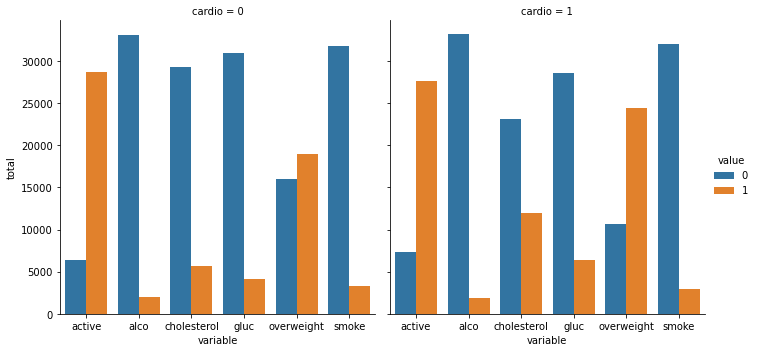

In [54]:
sns.catplot(x='variable', y='total', hue='value', 
              col='cardio', data=df_cat, kind='bar')


diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [63]:
df_fil = df[(df['ap_lo'] <= df['ap_hi'])
   &(df['height'] >= df['height'].quantile(0.025))
   &(df['height'] <= df['height'].quantile(0.975))
   &(df['weight'] >= df['weight'].quantile(0.025))
   &(df['weight'] <= df['weight'].quantile(0.975))
  ]

Text(0, 0.5, 'Height')

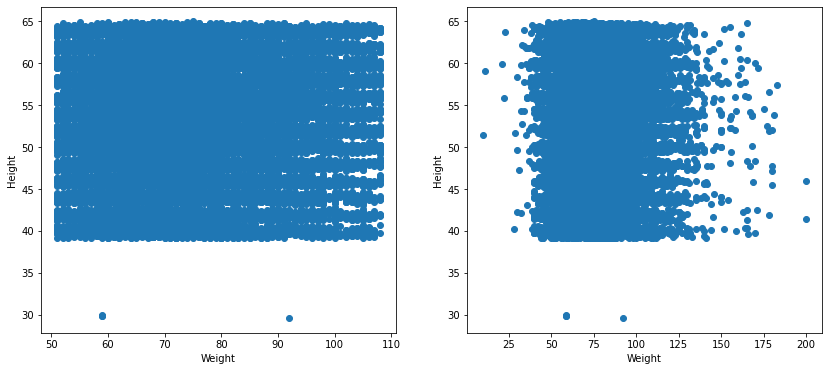

In [64]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(y= df_fil['age'], x = df_fil['weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

ax2 = fig.add_subplot(1,2,2)
plt.scatter(y= df['age'], x = df['weight'])
plt.xlabel('Weight')
plt.ylabel('Height')



In [76]:
df_corr = df_fil.corr()
df_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,1.000000,0.002511,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000021,-0.000902
age,0.002511,1.000000,-0.018116,-0.076946,0.070130,0.018705,0.153493,0.129977,0.086954,-0.044384,-0.026979,-0.011458,0.240219,0.110226,0.090548
gender,0.003426,-0.018116,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135380,-0.055071
height,0.000326,-0.076946,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.265845,-0.153194
weight,0.000149,0.070130,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862849,0.655866
ap_hi,0.003492,0.018705,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024937,0.017456
ap_lo,0.000484,0.153493,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.216748,0.172139
cholesterol,0.003719,0.129977,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.167384,0.128682
gluc,0.002289,0.086954,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121903,0.088988
smoke,-0.002732,-0.044384,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041568,-0.004941


<AxesSubplot:>

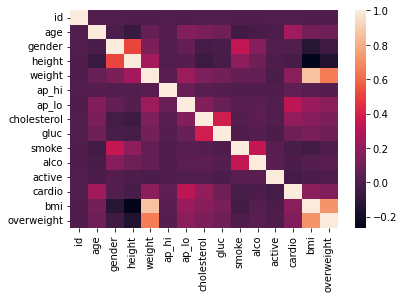

In [69]:
 # Generate a mask for the upper triangle
  mask = np.zeros_like(df_corr, dtype=np.bool)
 c.zeros_like

  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(11, 9))

  # Draw the heatmap with the mask
  sns.heatmap(df_corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\Owner\AppData\Local\Temp/ipykernel_31496/3628814967.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

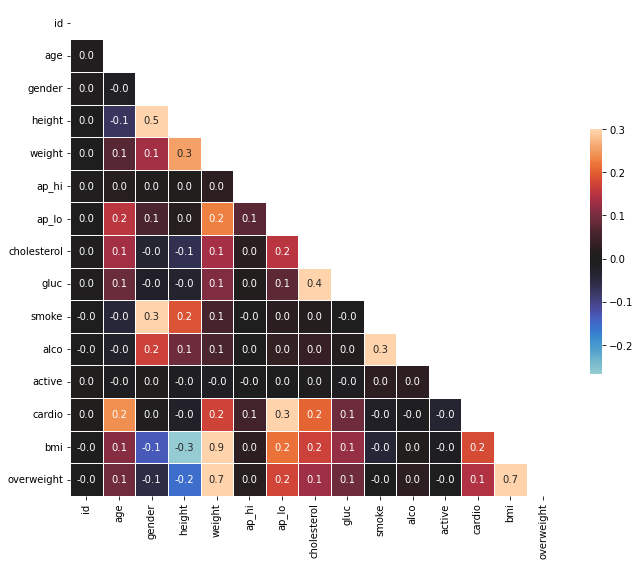

In [74]:
import numpy as np
    
# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

  # Draw the heatmap with the mask
sns.heatmap(df_corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [78]:
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
         9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 13, 13,
        14], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12, 13, 14,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  5,  6,  7,
         8,  9, 10, 11, 12, 13, 14,  6,  7,  8,  9, 10, 11, 12, 13, 14,  7,
         8,  9, 10, 11, 12, 13, 14,  8,  9, 10, 11, 12, 13, 1